# Pré-processamento

- Autor: Lucas Dias Noronha
- Ano: 2025
- Objetivo: Limpar, transformar e preparar os dados brutos para análise/modelagem

# Carregando Dependências

In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))  # sobe um nível e adiciona ao path

import numpy as np
import pandas as pd
from src.visualization.hist import PlotHist
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
db = pd.read_csv("../data/raw/dados_veiculos.csv")

In [3]:
db.head()

,ID do veículo,data,tempo de viagem,velocidade média,consumo de combustível,carga transportada,ID do motorista,feedback do cliente
0,1,2022-01-01 08:15:00,30,60,10,100,101,4.5
1,2,2022-01-02 14:30:00,45,55,15,200,102,4.2
2,3,2022-01-02 10:45:00,20,40,8,50,103,4.8
3,4,2022-01-03 09:20:00,35,50,12,150,101,3.9
4,5,2022-01-04 12:10:00,50,45,18,250,104,4.6


In [4]:
db.tail()

,ID do veículo,data,tempo de viagem,velocidade média,consumo de combustível,carga transportada,ID do motorista,feedback do cliente
95,96,2022-04-03 20:35:00,40,40,14,180,107,4.6
96,97,2022-04-04 19:30:00,55,35,19,280,108,4.2
97,98,2022-04-05 16:05:00,35,50,11,120,101,4.7
98,99,2022-04-06 17:40:00,40,45,13,150,102,4.3
99,100,2022-04-07 21:30:00,50,40,17,220,104,4.8


Excluindo variáveis do qual não me serão úteis

In [5]:
numeric_db = db.select_dtypes(include=["number"])
total_rows = len(db)
summary_numeric = pd.DataFrame({
    "dtype": numeric_db.dtypes,
    "n_null": numeric_db.isnull().sum(),
    "n_unique": numeric_db.nunique(),
    "mean": numeric_db.mean().round(2),
    "std": numeric_db.std().round(2),
    "variance": numeric_db.var().round(2),
    "coef_var (%)": ((numeric_db.std() / numeric_db.mean()) * 100).round(2),
    "min": numeric_db.min().round(2),
    "25%": numeric_db.quantile(0.25).round(2),
    "50% (mediana)": numeric_db.median().round(2),
    "75%": numeric_db.quantile(0.75).round(2),
    "max": numeric_db.max().round(2),
    "range": numeric_db.max().round(2) - numeric_db.min().round(2)
})

summary_numeric


,dtype,n_null,n_unique,mean,std,variance,coef_var (%),min,25%,50% (mediana),75%,max,range
ID do veículo,int64,0,100,50.50,29.01,841.67,57.45,1.0,25.75,50.5,75.25,100.0,99.0
tempo de viagem,int64,0,8,39.75,9.54,91.10,24.01,20.0,30.00,40.0,46.25,55.0,35.0
velocidade média,int64,0,6,46.85,7.84,61.44,16.73,35.0,40.00,45.0,51.25,60.0,25.0
consumo de combustível,int64,0,12,13.49,3.36,11.26,24.88,8.0,10.00,13.0,15.50,20.0,12.0
carga transportada,int64,0,11,165.80,64.81,4200.36,39.09,50.0,100.00,150.0,205.00,300.0,250.0
ID do motorista,int64,0,8,104.25,2.27,5.14,2.17,101.0,102.00,104.0,106.00,108.0,7.0
feedback do cliente,float64,0,12,4.46,0.28,0.08,6.28,3.7,4.20,4.5,4.70,4.9,1.2


In [6]:
db.columns.tolist()


['ID do veículo',
 'data',
 'tempo de viagem',
 'velocidade média',
 'consumo de combustível',
 'carga transportada',
 'ID do motorista',
 'feedback do cliente']

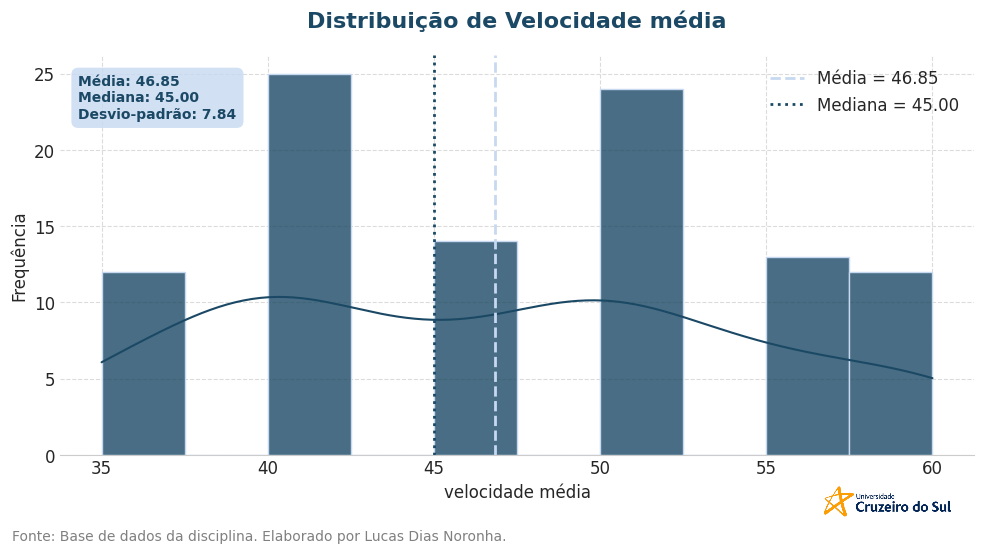

In [7]:
grafico = PlotHist(db, 'velocidade média')
grafico.plot_histograma()

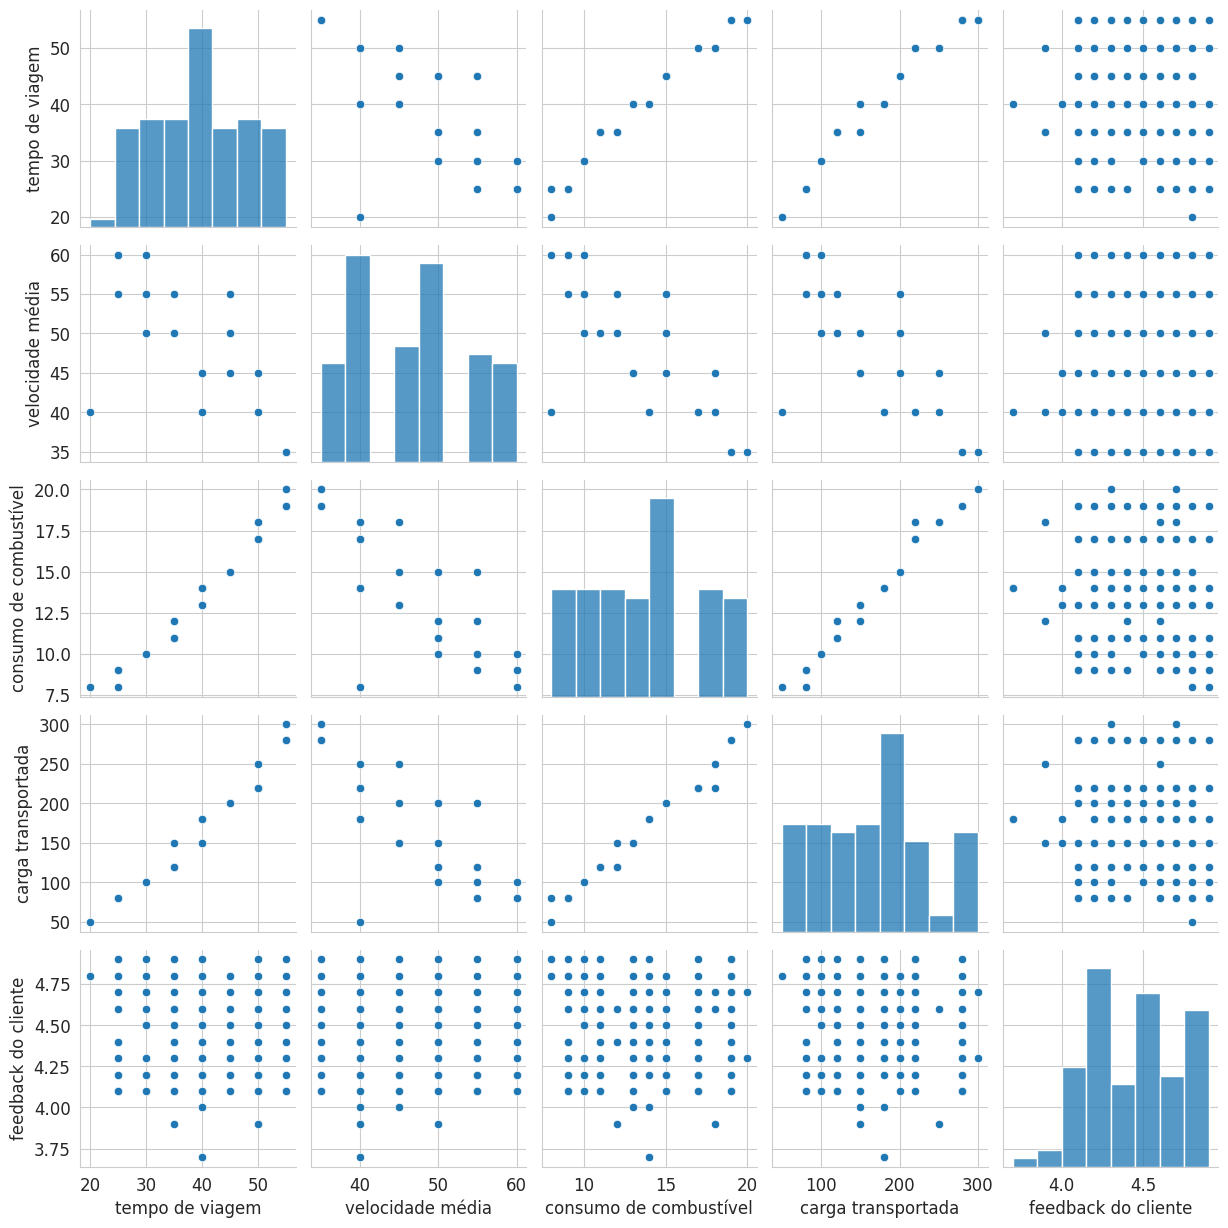

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(db[['tempo de viagem', 'velocidade média', 'consumo de combustível', 'carga transportada', 'feedback do cliente']])
plt.show()

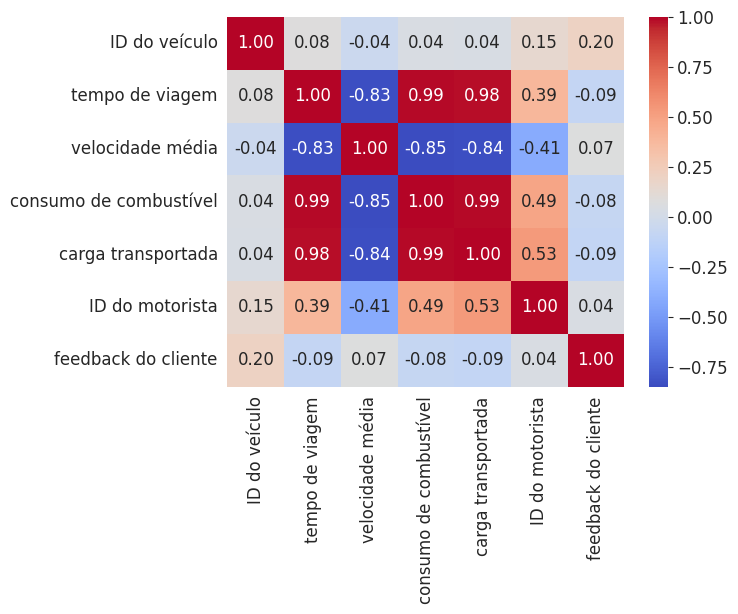

In [9]:
sns.heatmap(db.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [10]:
db.groupby('ID do motorista')[['velocidade média', 'consumo de combustível', 'feedback do cliente']].mean()


,velocidade média,consumo de combustível,feedback do cliente
ID do motorista,,,
101,50.357143,11.214286,4.400000
102,46.428571,12.714286,4.464286
103,54.285714,9.857143,4.514286
104,41.153846,17.000000,4.461538
105,47.916667,15.166667,4.375000
106,56.250000,10.250000,4.491667
107,39.545455,14.545455,4.500000
108,35.000000,19.000000,4.460000


In [11]:
db["data"] = pd.to_datetime(db["data"])
db["hora"] = db["data"].dt.time
db["data"] = db["data"].dt.date


In [12]:
db.sample(5)

,ID do veículo,data,tempo de viagem,velocidade média,consumo de combustível,carga transportada,ID do motorista,feedback do cliente,hora
38,39,2022-02-05,25,60,9,80,106,4.9,16:05:00
93,94,2022-04-01,45,50,15,200,105,4.5,17:50:00
13,14,2022-01-11,45,45,15,200,105,4.2,12:45:00
53,54,2022-02-20,45,50,15,200,105,4.3,13:10:00
35,36,2022-02-02,50,40,17,220,104,4.3,14:55:00


In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


/tmp/ipykernel_13812/2163264881.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t_mensal = t_diario.resample("M").mean()


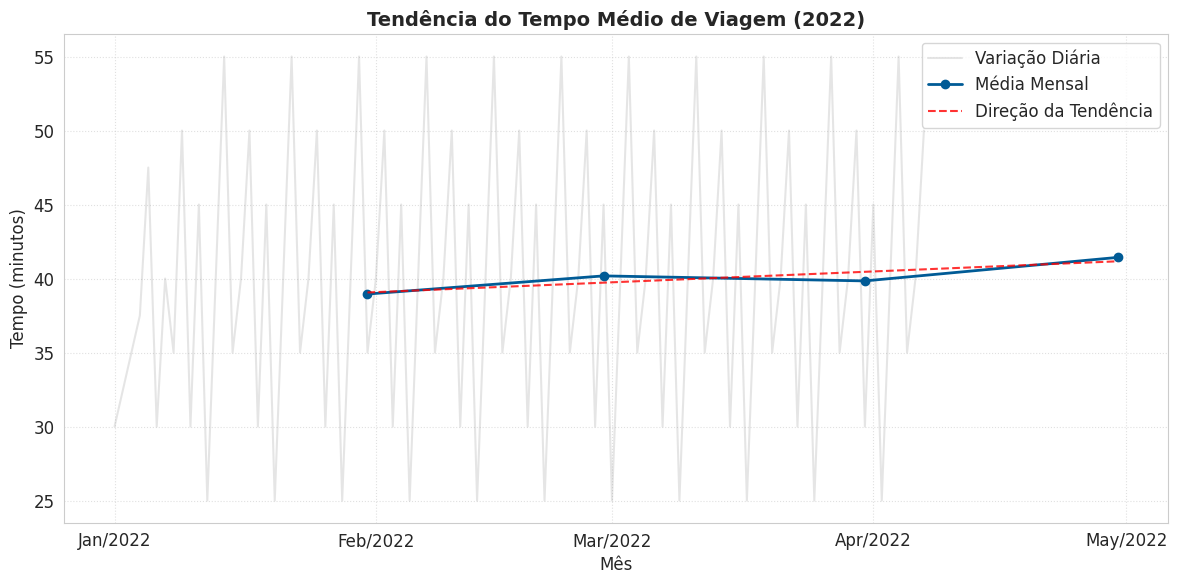

In [14]:


# 1. Certifique-se de usar a coluna de TEMPO, não velocidade
# Se sua coluna de tempo estiver em formato texto (ex: "00:45:00"), converta para minutos antes:
# db['tempo_minutos'] = pd.to_timedelta(db['sua_coluna_tempo']).dt.total_seconds() / 60
coluna_tempo = "tempo de viagem"  # <--- ALTE AQUI PARA O NOME DA SUA COLUNA

t_diario = db.groupby("data")[coluna_tempo].mean()
t_diario.index = pd.to_datetime(t_diario.index)
t_mensal = t_diario.resample("M").mean()

fig, ax = plt.subplots(figsize=(12, 6))

# (Opcional) Dados diários de fundo para contexto
ax.plot(t_diario.index, t_diario.values, color='gray', alpha=0.2, label='Variação Diária')

# Sua linha mensal principal
ax.plot(t_mensal.index, t_mensal.values, marker="o", linewidth=2, color='#005b96', label='Média Mensal')

# (Opcional) Linha de Tendência Linear Automática
x_num = mdates.date2num(t_mensal.index)
z = np.polyfit(x_num, t_mensal.values, 1)
p = np.poly1d(z)
ax.plot(t_mensal.index, p(x_num), "r--", alpha=0.8, label='Direção da Tendência')

ax.set_title(f"Tendência do Tempo Médio de Viagem ({t_mensal.index.min().strftime('%Y')})", fontsize=14)
ax.set_ylabel("Tempo (minutos)")
ax.set_xlabel("Mês")

# Formatação de datas limpa
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))

ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

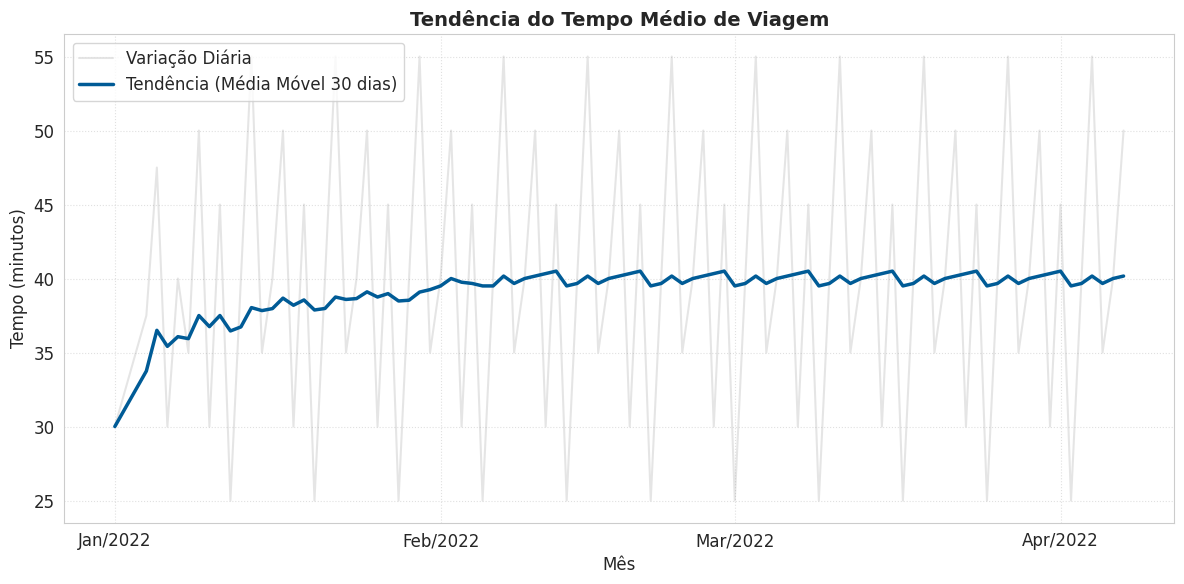

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np


coluna_tempo = "tempo de viagem"

t_diario = db.groupby("data")[coluna_tempo].mean()
t_diario.index = pd.to_datetime(t_diario.index)

# --- MUDANÇA PRINCIPAL: DE RESAMPLE PARA ROLLING (MÉDIA MÓVEL) ---
# Em vez de agrupar por mês, calculamos a média dos últimos 30 dias.
# Isso cria uma linha suave que para exatamente no último dia de dados.
t_tendencia = t_diario.rolling('30D', min_periods=1).mean()
# '30D' = janela de 30 dias
# min_periods=1 = Começa a calcular imediatamente (não espera ter 30 dias)
# --- FIM DA MUDANÇA ---

fig, ax = plt.subplots(figsize=(12, 6))

# Dados diários de fundo para contexto
ax.plot(t_diario.index, t_diario.values, color='gray', alpha=0.2, label='Variação Diária')

# Linha da tendência principal (agora usando a Média Móvel)
# Note: 'marker=""' (sem marcador) deixa a linha mais limpa
ax.plot(t_tendencia.index, t_tendencia.values, marker="", linewidth=2.5, color='#005b96', label='Tendência (Média Móvel 30 dias)')

# A linha de regressão vermelha não é mais necessária,
# pois a média móvel já é a própria linha de tendência.

ax.set_title(f"Tendência do Tempo Médio de Viagem", fontsize=14)
ax.set_ylabel("Tempo (minutos)")
ax.set_xlabel("Mês")

# Formatação de datas limpa
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))

ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

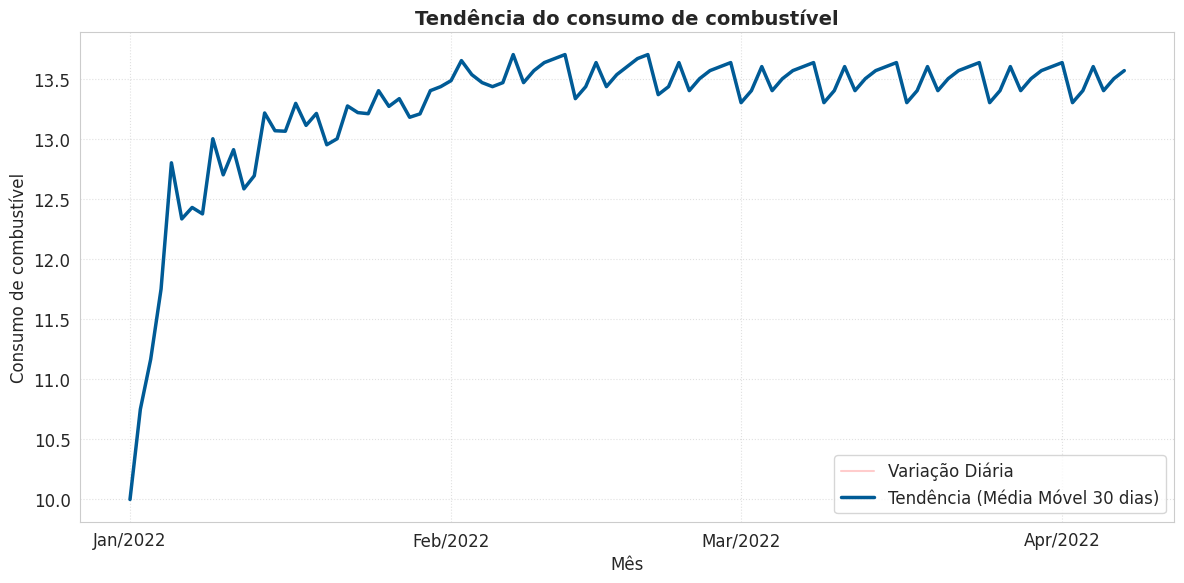

In [21]:
consumo_diario_media = db.groupby("data")["consumo de combustível"].mean()
consumo_diario_media.index = pd.to_datetime(consumo_diario_media.index)

media_movel = consumo_diario_media.rolling('30D', min_periods=1).mean()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(media_movel.index, media_movel.values, color='red', alpha=0.2, label='Variação Diária')

ax.plot(media_movel.index, media_movel.values, marker="", linewidth=2.5, color='#005b96', label='Tendência (Média Móvel 30 dias)')

ax.set_title(f"Tendência do consumo de combustível", fontsize=14)
ax.set_ylabel("Consumo de combustível")
ax.set_xlabel("Mês")

# Formatação de datas limpa
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))

ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

In [19]:
db.columns.tolist()

['ID do veículo',
 'data',
 'tempo de viagem',
 'velocidade média',
 'consumo de combustível',
 'carga transportada',
 'ID do motorista',
 'feedback do cliente',
 'hora']